# Jonathan Halverson
# Wednesday, May 4, 2016
# Loading and saving data

### Text files

In [1]:
# create an RDD of a string per line in the text file
lines = sc.textFile('text_file.md')
print lines.count()
print lines.first()

95
# Apache Spark


In [2]:
# example of treating a CSV file like a textfile
crimes = sc.textFile('Crime_Incident_Reports.csv')
knife = crimes.filter(lambda x: 'knife' in x.lower())
knife.top(2)

[u'152049788,PKNIFE,InvPer,InvPer,B2,0,06/16/2015 01:06:00 AM,Knife,No,No,Last,2015,6,Tuesday,Part three,768774.7954,2945069.352,DUDLEY ST,,"(42.32866635, -71.08355955)"',
 u'152049566,VAND,VANDALISM,14xx,B2,0,06/14/2015 11:50:00 AM,Knife,No,No,Day,2015,6,Sunday,Part Two,768378.1791,2947110.029,SOJOURNER TRUTH CT,,"(42.33427135, -71.08498955)"']

In [3]:
knife.saveAsTextFile('./saveAs')

In [4]:
# the key is the file name and value the contents of the file
input = sc.wholeTextFiles('text_files')
print input.count()
print input.collect()

2
[(u'file:/Users/jhalverson/data_science/spark/text_files/multi_text.1', u'Charlie 12 10.4\nBeverly 9  16.1\nAnne    11 34.0\n'), (u'file:/Users/jhalverson/data_science/spark/text_files/multi_text.2', u'Chad    40  9.8\nDerek   19  3.3\nChloe   31  7.9\n')]


In [5]:
input.mapValues(lambda line: line.split()).values().collect()

[[u'Charlie',
  u'12',
  u'10.4',
  u'Beverly',
  u'9',
  u'16.1',
  u'Anne',
  u'11',
  u'34.0'],
 [u'Chad', u'40', u'9.8', u'Derek', u'19', u'3.3', u'Chloe', u'31', u'7.9']]

Use saveAsTextFile for writing both CSV and JSON. Use the json.dumps method on each line, for instance.

### JSON

In [6]:
# to read JSON, it is best to read as the text file and then parse
lines = sc.textFile('person.json', use_unicode=False)
print lines.count()
print lines.collect()

2
['{"firstName": "John","lastName": "Smith","address": {"city": "New York","state": "NY","postalCode": "10021"},"phoneNumbers": [{"type": "home","number": "212 555-1234"}]}', '{"firstName": "Jimmy","lastName": "Cutts","address": {"city": "Buffalo","state": "NY","postalCode": "10541"},"phoneNumbers": [{"type": "home","number": "567 555-4991"}]}']


In [7]:
import json
data = lines.map(json.loads)
print data.count()
print data.first()

2
{u'lastName': u'Smith', u'phoneNumbers': [{u'type': u'home', u'number': u'212 555-1234'}], u'firstName': u'John', u'address': {u'postalCode': u'10021', u'city': u'New York', u'state': u'NY'}}


In [8]:
data.filter(lambda x: x['lastName'] == 'Cutts').collect()

[{u'address': {u'city': u'Buffalo', u'postalCode': u'10541', u'state': u'NY'},
  u'firstName': u'Jimmy',
  u'lastName': u'Cutts',
  u'phoneNumbers': [{u'number': u'567 555-4991', u'type': u'home'}]}]

In [9]:
import csv
import StringIO

# approach works best when the header is removed from the csv file
header = ['COMPNOS', 'NatureCode', 'INCIDENT_TYPE_DESCRIPTION', 'MAIN_CRIMECODE', 'REPTDISTRICT',
          'REPORTINGAREA', 'FROMDATE', 'WEAPONTYPE', 'Shooting', 'DOMESTIC', 'SHIFT', 'Year',
          'Month', 'DAY_WEEK', 'UCRPART', 'X', 'Y', 'STREETNAME', 'XSTREETNAME', 'Location']
filename = '/Users/jhalverson/data_science/spark/Crime_Incident_Reports.csv'
filename = '/Users/jhalverson/data_science/spark/Crime_Incident_Reports_no_header.csv'
if 0:
    header = []
    filename = '/Users/jhalverson/data_science/spark/Crime_Incident_Reports_no_header.csv'
    
def loadRecord(line):
    sline = StringIO.StringIO(line)
    reader = csv.DictReader(sline, fieldnames=header)
    return reader.next()

crimes = sc.textFile(filename).map(loadRecord)
crimes.take(2)

[{'COMPNOS': '120420285',
  'DAY_WEEK': 'Sunday',
  'DOMESTIC': 'No',
  'FROMDATE': '07/08/2012 06:00:00 AM',
  'INCIDENT_TYPE_DESCRIPTION': 'RESIDENTIAL BURGLARY',
  'Location': '(42.34638135, -71.10379454)',
  'MAIN_CRIMECODE': '05RB',
  'Month': '7',
  'NatureCode': 'BERPTA',
  'REPORTINGAREA': '629',
  'REPTDISTRICT': 'D4',
  'SHIFT': 'Last',
  'STREETNAME': 'ABERDEEN ST',
  'Shooting': 'No',
  'UCRPART': 'Part One',
  'WEAPONTYPE': 'Other',
  'X': '763273.1791',
  'XSTREETNAME': '',
  'Y': '2951498.962',
  'Year': '2012'},
 {'COMPNOS': '120419202',
  'DAY_WEEK': 'Sunday',
  'DOMESTIC': 'No',
  'FROMDATE': '07/08/2012 06:03:00 AM',
  'INCIDENT_TYPE_DESCRIPTION': 'AGGRAVATED ASSAULT',
  'Location': '(42.31684135, -71.07458456)',
  'MAIN_CRIMECODE': '04xx',
  'Month': '7',
  'NatureCode': 'PSHOT ',
  'REPORTINGAREA': '327',
  'REPTDISTRICT': 'B2',
  'SHIFT': 'Last',
  'STREETNAME': 'HOWARD AV',
  'Shooting': 'Yes',
  'UCRPART': 'Part One',
  'WEAPONTYPE': 'Firearm',
  'X': '771223.16

In [10]:
crimes.map(lambda x: x['WEAPONTYPE']).countByValue().items()

[('None', 11319),
 ('Personal Weapon (hand  foot  etc.)', 282),
 ('Knife/Cutting Instrument', 177),
 ('Unarmed', 194932),
 ('Other', 52102),
 ('Blunt Object', 78),
 ('Firearm', 5299),
 ('Knife', 3867)]

In [11]:
rdd = sc.textFile("/Users/jhalverson/data_science/spark/Crime_Incident_Reports.csv")
rdd = rdd.mapPartitions(lambda x: csv.reader(x))
print rdd.take(3)

[['COMPNOS', 'NatureCode', 'INCIDENT_TYPE_DESCRIPTION', 'MAIN_CRIMECODE', 'REPTDISTRICT', 'REPORTINGAREA', 'FROMDATE', 'WEAPONTYPE', 'Shooting', 'DOMESTIC', 'SHIFT', 'Year', 'Month', 'DAY_WEEK', 'UCRPART', 'X', 'Y', 'STREETNAME', 'XSTREETNAME', 'Location'], ['120420285', 'BERPTA', 'RESIDENTIAL BURGLARY', '05RB', 'D4', '629', '07/08/2012 06:00:00 AM', 'Other', 'No', 'No', 'Last', '2012', '7', 'Sunday', 'Part One', '763273.1791', '2951498.962', 'ABERDEEN ST', '', '(42.34638135, -71.10379454)'], ['120419202', 'PSHOT ', 'AGGRAVATED ASSAULT', '04xx', 'B2', '327', '07/08/2012 06:03:00 AM', 'Firearm', 'Yes', 'No', 'Last', '2012', '7', 'Sunday', 'Part One', '771223.1638', '2940772.099', 'HOWARD AV', '', '(42.31684135, -71.07458456)']]


In [12]:
weapons = rdd.map(lambda x: x[7]).filter(lambda x: x != 'WEAPONTYPE').countByValue().items()
weapons

[('None', 11319),
 ('Personal Weapon (hand  foot  etc.)', 282),
 ('Knife/Cutting Instrument', 177),
 ('Unarmed', 194932),
 ('Other', 52102),
 ('Blunt Object', 78),
 ('Firearm', 5299),
 ('Knife', 3867)]

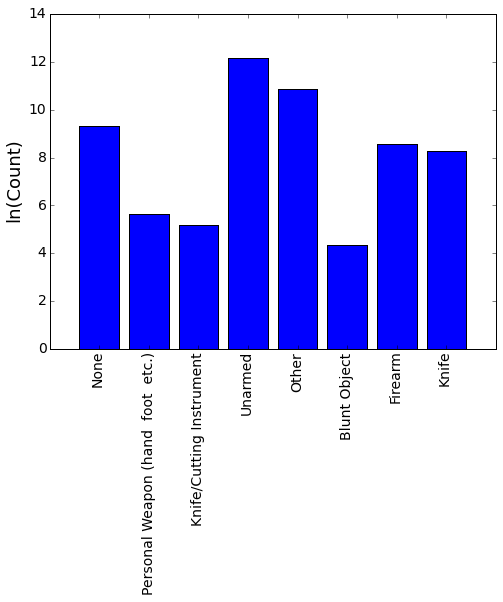

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

labels, counts = zip(*weapons)

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.bar(range(len(counts)), np.log(counts), align='center')
ax.set_xticklabels(labels)
plt.xticks(range(len(counts)), rotation='vertical')
plt.ylabel('ln(Count)')

### Hadoop sequence files

Good for writing key/value pairs. Can be read in parallel and are binary.

In [15]:
elk_sightings = sc.parallelize([('Frank', 4), ('Tony', 0), ('Catherine', 0)])
elk_sightings.saveAsSequenceFile('seqfiles')

In [20]:
data = sc.sequenceFile('seqfiles', 'org.apache.hadoop.io.Text', 'org.apache.hadoop.io.IntWritable')
data.collect()

[(u'Frank', 4), (u'Tony', 0), (u'Catherine', 0)]

### Hive

In [ ]:
from pyspark.sql import HiveContext
hiveCtx = HiveContext(sc)
#lines = hiveCtx.jsonFile('person.json')
#lines.registerTempTable('lines')
#results = hiveCtx.sql("SELECT firstName FROM lines")